# 2015 Tainan Dengue Case Study

In [1]:
import pandas as pd
import numpy as np
import scipy as si
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

## Load data set

In [2]:
df = pd.read_excel("./dgcase.xlsx")

In [3]:
AST = pd.read_excel("./dgcase.xlsx", "AST")
ALT = pd.read_excel("./dgcase.xlsx", "ALT")
APTT = pd.read_excel("./dgcase.xlsx", "APTT")
Platelet = pd.read_excel("./dgcase.xlsx", "Platelet")


In [4]:
df.head()

,chartno,age,sex,onset_date,diag_date,death_date,is_hospitalization,Fatal
0,A1564,74,1,2015-08-31,2015-09-02,NaN,0,0
1,A1878,71,1,2015-09-09,2015-09-15,NaN,0,0
2,A8146,38,0,2015-08-11,2015-08-14,NaN,0,0
3,A8476,55,0,2015-09-17,2015-09-17,NaN,0,0
4,A15171,44,1,2015-09-28,2015-09-28,NaN,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4069 entries, 0 to 4068
Data columns (total 8 columns):
chartno               4069 non-null object
age                   4069 non-null int64
sex                   4069 non-null int64
onset_date            4069 non-null object
diag_date             4069 non-null object
death_date            37 non-null object
is_hospitalization    4069 non-null int64
Fatal                 4069 non-null int64
dtypes: int64(4), object(4)
memory usage: 254.4+ KB


In [6]:
df['death_date'].isna().value_counts()

True     4032
False      37
Name: death_date, dtype: int64

### Add onset date and diag date label

In [7]:
df['onset_month'] = pd.DatetimeIndex(df['onset_date']).month
df['diag_month'] = pd.DatetimeIndex(df['diag_date']).month
df['onset_month'].value_counts()

9     2352
8      825
10     668
11     136
7       67
12      16
6        4
1        1
Name: onset_month, dtype: int64

### Live v.s. dead in different onset month

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


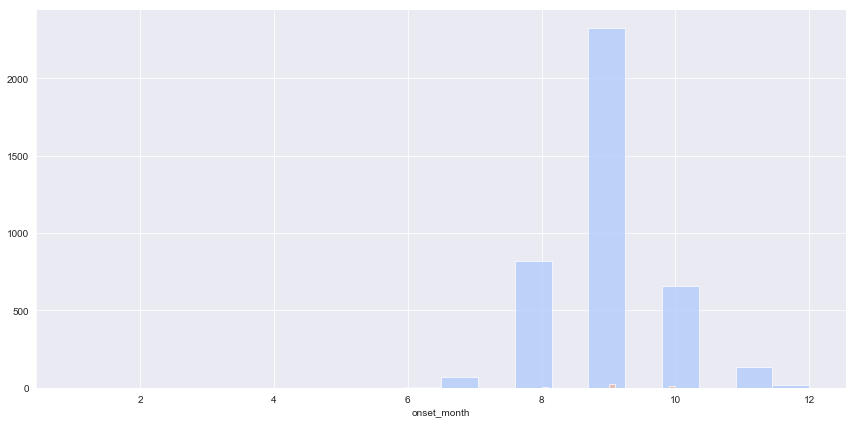

In [8]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Fatal",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'onset_month',bins=20,alpha=0.7)

### Live v.s. Dead in different diag date

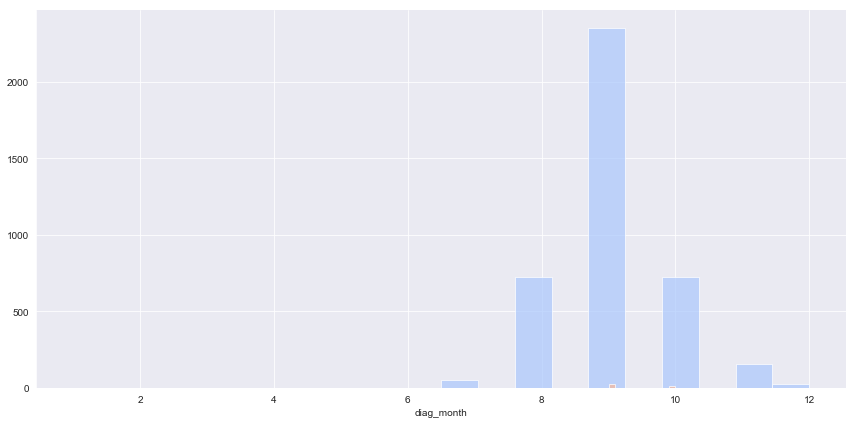

In [9]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Fatal",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'diag_month',bins=20,alpha=0.7)

### Whether hospitalized or not in different onset month 

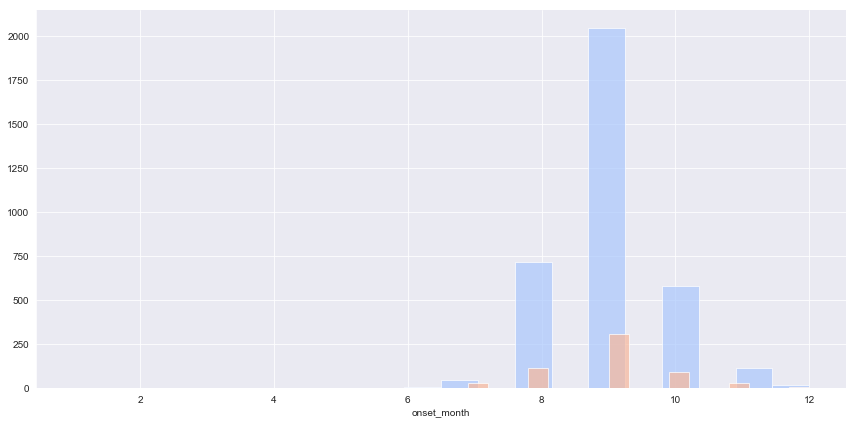

In [10]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="is_hospitalization",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'onset_month',bins=20,alpha=0.7)

### Whether hospitalized or not in different diag month 

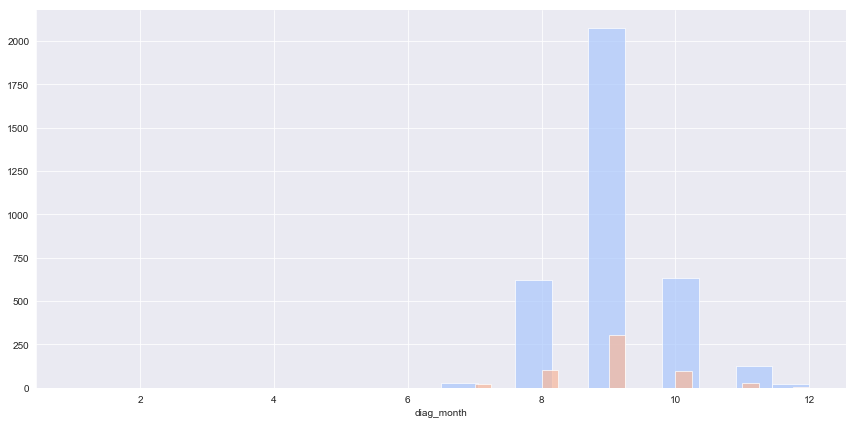

In [11]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="is_hospitalization",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'diag_month',bins=20,alpha=0.7)

### is_hospitalization v.s. sex and age

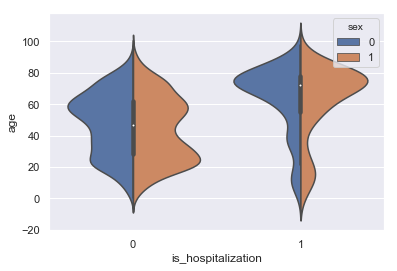

In [15]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.violinplot(x="is_hospitalization", y="age", hue="sex", data = df, split = True, scale = "count")

### onset_month v.s. sex and age

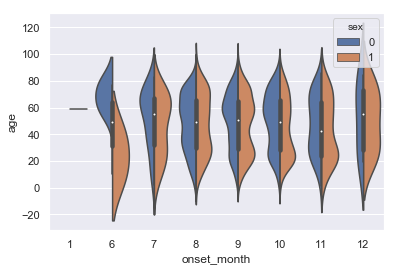

In [16]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.violinplot(x="onset_month", y="age", hue="sex", data = df, split = True, scale = "count")


In [18]:
df.describe()

,age,sex,is_hospitalization,Fatal,onset_month,diag_month
count,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000
mean,48.018924,0.504547,0.137134,0.009093,9.002212,9.067338
std,21.540725,0.500041,0.344031,0.094935,0.791576,0.791043
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,29.000000,0.000000,0.000000,0.000000,9.000000,9.000000
50%,50.000000,1.000000,0.000000,0.000000,9.000000,9.000000
75%,66.000000,1.000000,0.000000,0.000000,9.000000,9.000000
max,98.000000,1.000000,1.000000,1.000000,12.000000,12.000000


In [19]:
df['Fatal'].value_counts()

0    4032
1      37
Name: Fatal, dtype: int64

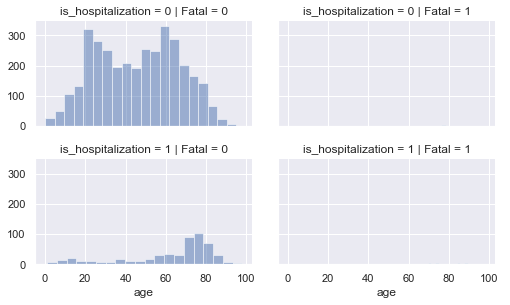

In [20]:
grid = sns.FacetGrid(df, col='Fatal', row='is_hospitalization', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

### Check is there NaN data in Ast data frame?

In [21]:
AST.isna().any()

chartno    False
type       False
Day        False
value      False
dtype: bool

In [22]:
AST['type'].value_counts()

1    5804
0      60
Name: type, dtype: int64

In [23]:
AST.head(1)

,chartno,type,Day,value
0,A8476,1,0,42


### Day v.s. AST value and dead ror not

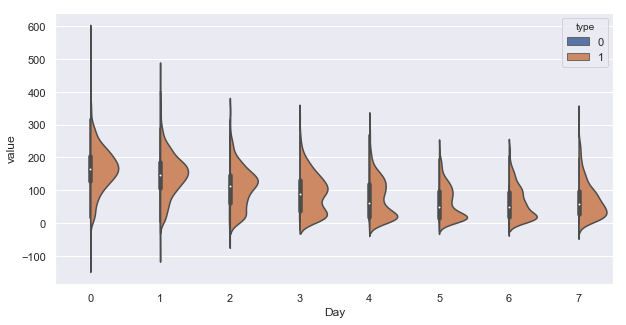

In [42]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.violinplot(x="Day", y="value", hue="type", data = Platelet, split = True, scale ="count")



In [28]:
Platelet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 4 columns):
chartno    3682 non-null object
type       3682 non-null int64
Day        3682 non-null int64
value      3682 non-null int64
dtypes: int64(3), object(1)
memory usage: 115.1+ KB


### Separately merge AST, APTT, ALT, Platelet into original dataset

In [29]:
AST_df = pd.merge(AST, df)
APTT_df = pd.merge(APTT, df)
ALT_df = pd.merge(ALT, df)
Platelet_df = pd.merge(Platelet, df)

### is_hospitalization v.s. Day and Platelet value

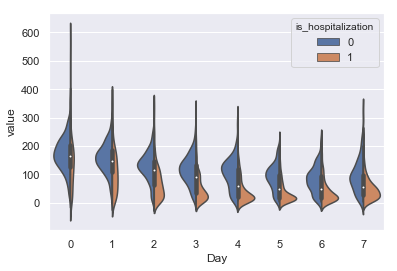

In [30]:
sns.set(style="darkgrid")
ax = sns.violinplot(x="Day", y="value", hue="is_hospitalization", data = Platelet_df, split = True, scale = "count")

### is_hospitalization v.s. Day and APTT value

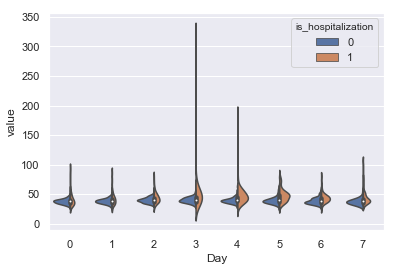

In [31]:
sns.set(style="darkgrid")
ax = sns.violinplot(x="Day", y="value", hue="is_hospitalization", data = APTT_df, split = True, scale = "count")

### is_hospitalization v.s. Day and ALT value

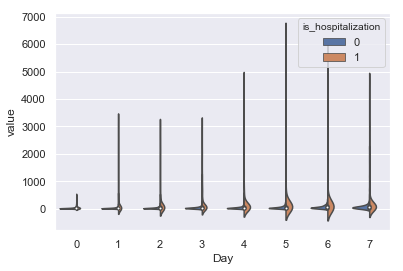

In [32]:
sns.set(style="darkgrid")
ax = sns.violinplot(x="Day", y="value", hue="is_hospitalization", data = ALT_df, split = True, scale = "count")

### is_hospitalization v.s. sex and ALT value

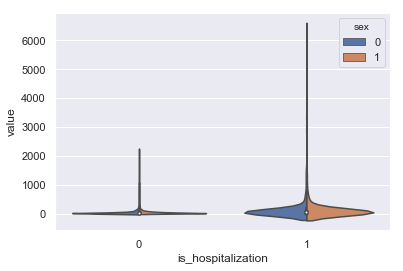

In [34]:
sns.set(style="darkgrid")
ax = sns.violinplot(x="is_hospitalization", y="value", hue="sex", data = ALT_df, split = True, scale = "count")


### AST value distribution

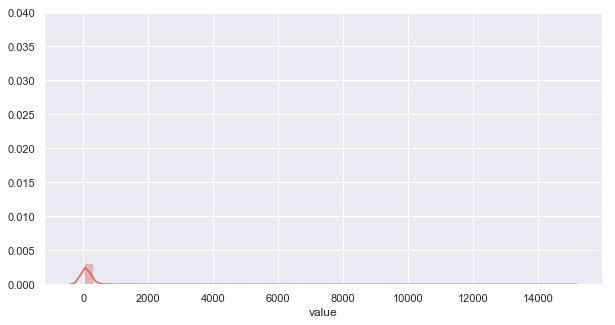

In [36]:
import seaborn as sns, numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from numpy.random import randn

sns.set_palette("hls")
mpl.rc("figure", figsize=(10, 5))
plt.ylim(0, 0.04)
#data = randn(200)

sns.distplot(AST_df['value'], norm_hist = False)

### AST value distribution v.s. is_hospitalization

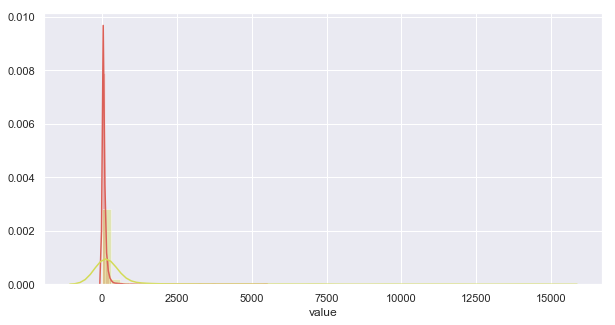

In [37]:
mpl.rc("figure", figsize=(10, 5))
h = AST_df[AST_df['is_hospitalization'] == 0]['value']
sns.distplot(h, norm_hist = True)
nh = AST_df[AST_df['is_hospitalization'] == 1]['value']
sns.distplot(nh, norm_hist = True)

### Platelet value distribution v.s. is_hospitalization

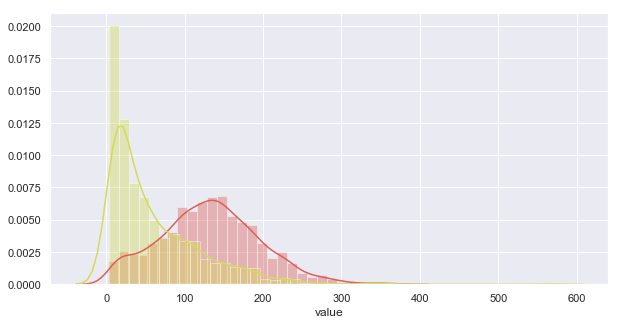

In [40]:
mpl.rc("figure", figsize=(10, 5))
h = Platelet_df[Platelet_df['is_hospitalization'] == 0]['value']
sns.distplot(h, norm_hist = True)
nh = Platelet_df[Platelet_df['is_hospitalization'] == 1]['value']
sns.distplot(nh, norm_hist = True)

In [44]:
Platelet.count()

chartno    3682
type       3682
Day        3682
value      3682
dtype: int64

In [45]:
AST = AST.rename(columns = {'value':'AST'})
ALT = ALT.rename(columns = {'value':'ALT'})
APTT = APTT.rename(columns = {'value':'APTT'})
Platelet = Platelet.rename(columns = {'value':'Platelet'})

In [46]:
new_df = pd.merge(AST,ALT)
AST_ALT= new_df
AST_ALT_df = pd.merge(AST_ALT ,df)
new_df = pd.merge(new_df, APTT)
new_df = pd.merge(new_df ,Platelet)
new_df = pd.merge(new_df ,df)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431 entries, 0 to 430
Data columns (total 16 columns):
chartno               431 non-null object
type                  431 non-null int64
Day                   431 non-null int64
AST                   431 non-null int64
ALT                   431 non-null int64
APTT                  431 non-null float64
Platelet              431 non-null int64
age                   431 non-null int64
sex                   431 non-null int64
onset_date            431 non-null object
diag_date             431 non-null object
death_date            16 non-null object
is_hospitalization    431 non-null int64
Fatal                 431 non-null int64
onset_month           431 non-null int64
diag_month            431 non-null int64
dtypes: float64(1), int64(11), object(4)
memory usage: 57.2+ KB


### AST/ALT value v.s. is_hospitalization distribution

In [47]:
AST_ALT_df['AST/ALT'] = AST_ALT_df['AST']/AST_ALT_df['ALT']
AST_ALT_df = AST_ALT_df[AST_ALT_df['AST/ALT'] < 6]

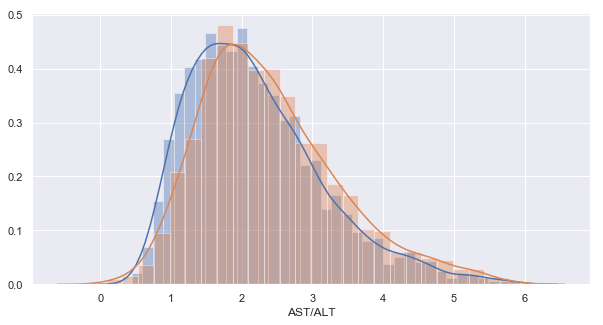

In [48]:
mpl.rc("figure", figsize=(10, 5))
h = AST_ALT_df[AST_ALT_df['is_hospitalization'] == 0]['AST/ALT']
sns.distplot(h, norm_hist = True)
nh = AST_ALT_df[AST_ALT_df['is_hospitalization'] == 1]['AST/ALT']
sns.distplot(nh, norm_hist = True)